In [ ]:
%pip install opendatasets --upgrade

In [ ]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels'
od.download(dataset_url)

In [1]:
# importing the dependancies
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [4]:
# importing the dataset 

df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# checking top 5 rows of the dataset
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Attributes related with eating habits are:
Frequent consumption of high caloric food `(FAVC)`,

Frequency of consumption of vegetables `(FCVC)`,

Number of main meals `(NCP)`,

Consumption of food between meals `(CAEC)`,

Consumption of water daily `(CH20)`,

and Consumption of alcohol `(CALC)`.

### Attributes related with the physical condition are:
Calories consumption monitoring `(SCC)`,

Physical activity frequency `(FAF)`,

Time using technology devices `(TUE)`,

Transportation used `(MTRANS)`,

Other variables were:
`Gender`, `Age`, `Height` and `Weight`.

In [5]:
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (2111, 17)


In [6]:
# checking the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
# checking for null values in the dataset
print(f"Null values in the dataset:\n{df.isnull().sum()}")

Null values in the dataset:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [8]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [9]:
# distribution of the data
df.groupby('NObeyesdad').count()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
NObeyesdad,,,,,,,,,,,,,,,,
Insufficient_Weight,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272
Normal_Weight,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287
Obesity_Type_I,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351
Obesity_Type_II,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297
Obesity_Type_III,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324
Overweight_Level_I,290,290,290,290,290,290,290,290,290,290,290,290,290,290,290,290
Overweight_Level_II,290,290,290,290,290,290,290,290,290,290,290,290,290,290,290,290


In [10]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [11]:
for i in ['Age', 'Height', 'Weight']:
    print(f"Minimum {str(i)} in the dataset: {df[i].min()}")
    print(f"Mean {str(i)} in the dataset: {round(df[i].mean(), 2)}")
    print((f"Maxmum {str(i)} in the dataset: {df[i].max()}\n"))

Minimum Age in the dataset: 14.0
Mean Age in the dataset: 24.31
Maxmum Age in the dataset: 61.0

Minimum Height in the dataset: 1.45
Mean Height in the dataset: 1.7
Maxmum Height in the dataset: 1.98

Minimum Weight in the dataset: 39.0
Mean Weight in the dataset: 86.59
Maxmum Weight in the dataset: 173.0



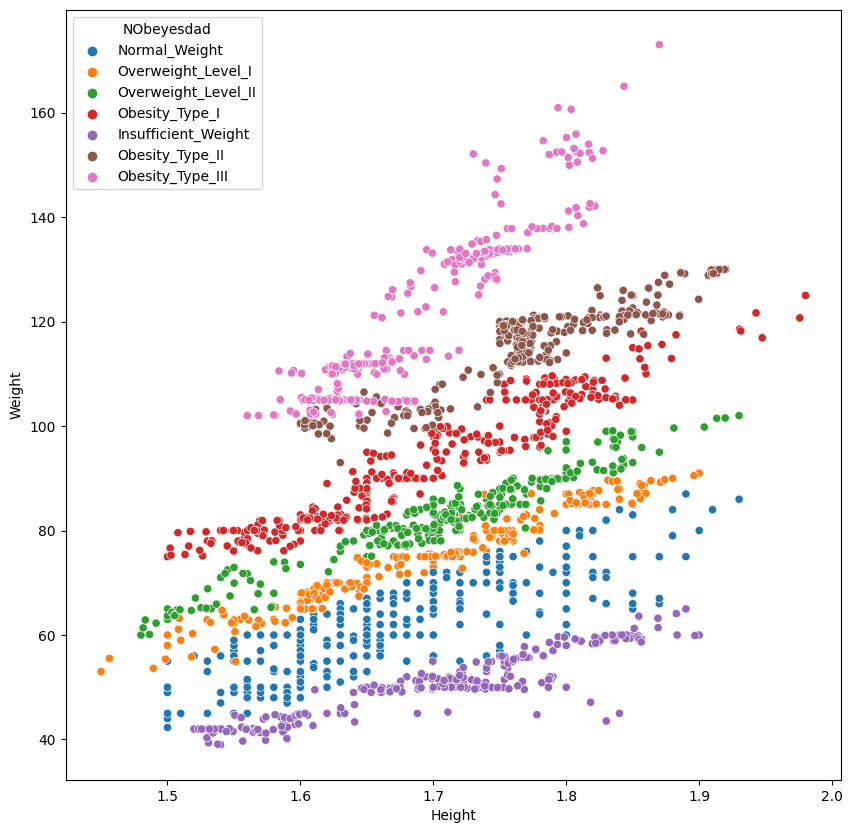

In [12]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x=df.Height, y=df.Weight, hue=df.NObeyesdad);

**Obeservation** Height and Wight follows a linear pattern

Gender
Male      1068
Female    1043
Name: count, dtype: int64


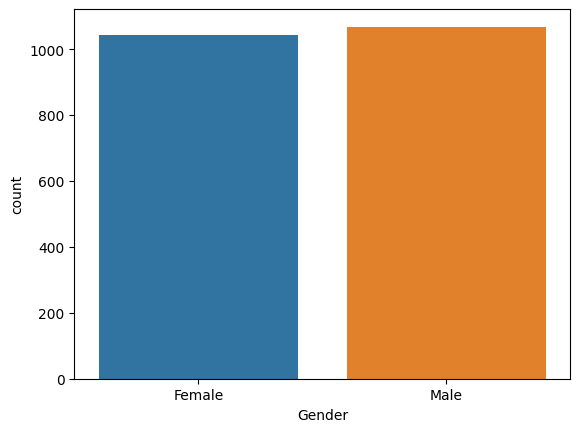

In [13]:
# Distribution of gender in the dataset
print(df['Gender'].value_counts())
sns.countplot(data=df, x=df.Gender);

Distribution Based on Gender:


Gender
NObeyesdad          Gender        
Insufficient_Weight Female     173
                    Male        99
Normal_Weight       Female     141
                    Male       146
Obesity_Type_I      Female     156
                    Male       195
Obesity_Type_II     Female       2
                    Male       295
Obesity_Type_III    Female     323
                    Male         1
Overweight_Level_I  Female     145
                    Male       145
Overweight_Level_II Female     103
                    Male       187

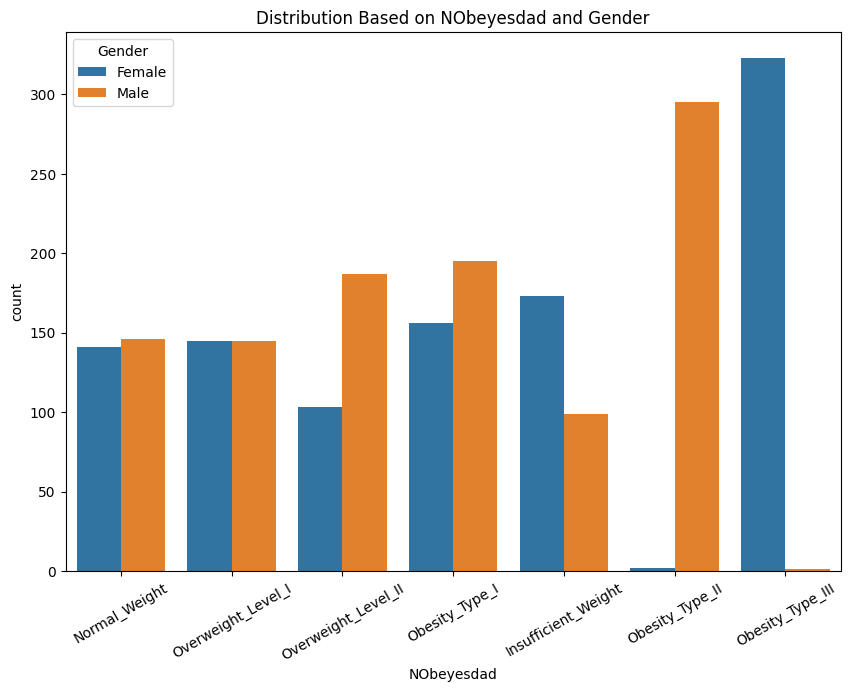

In [14]:
import IPython.display as display

print("Distribution Based on Gender:")
gender_df = pd.DataFrame(df.groupby(['NObeyesdad','Gender'])['Gender'].count())
display.display(gender_df)

plt.figure(figsize=(10, 7))
plt.xticks(rotation=30)
plt.title("Distribution Based on NObeyesdad and Gender")
sns.countplot(data=df, x=df.NObeyesdad, hue=df.Gender);



**Obeservation** Maximum cases of `Obesity_Type_II` are observed in `Male` and Maximum cases of `Obesity_Type_III` are observed in `Female`

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64


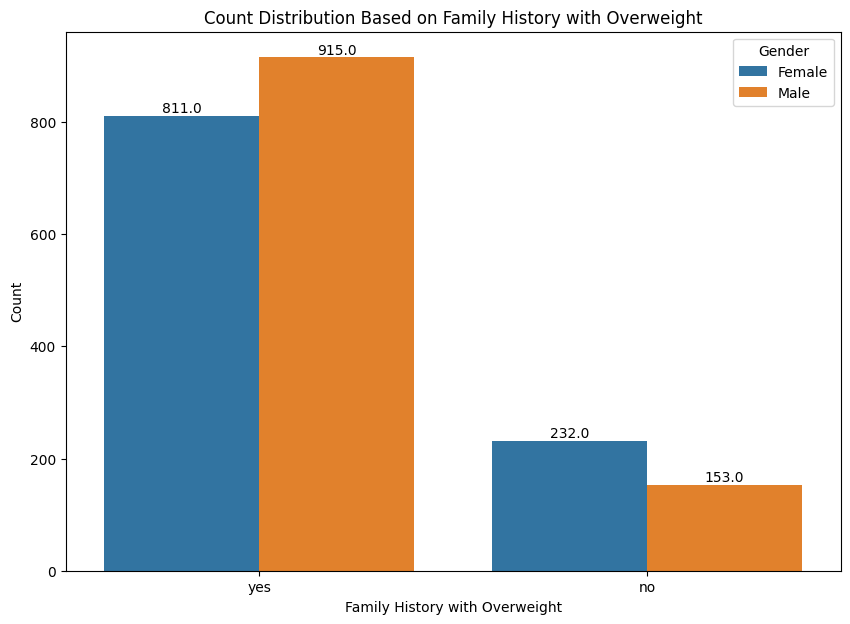

In [15]:
# Print the value counts of 'family_history_with_overweight'
print(df['family_history_with_overweight'].value_counts())

# Create the countplot
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x=df.family_history_with_overweight, hue=df.Gender)

# Add value labels to each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', color='black')

plt.xlabel('Family History with Overweight')
plt.ylabel('Count')
plt.title('Count Distribution Based on Family History with Overweight')
plt.show()


In [16]:
pd.DataFrame(df.groupby(['NObeyesdad','family_history_with_overweight','Gender'])['Gender'].count())

Gender
NObeyesdad          family_history_with_overweight Gender        
Insufficient_Weight no                             Female     129
                                                   Male        17
                    yes                            Female      44
                                                   Male        82
Normal_Weight       no                             Female      65
                                                   Male        67
                    yes                            Female      76
                                                   Male        79
Obesity_Type_I      no                             Female       1
                                                   Male         6
                    yes                            Female     155
                                                   Male       189
Obesity_Type_II     no                             Female       1
                    yes                            Female       1
                                                   Male       295
Obesity_Type_III    yes                            Female     323
                                                   Male         1
Overweight_Level_I  no                             Female      34
                                                   Male        47
                    yes                            Female     111
                                                   Male        98
Overweight_Level_II no                             Female       2
                                                   Male        16
                    yes                            Female     101
                                                   Male       171

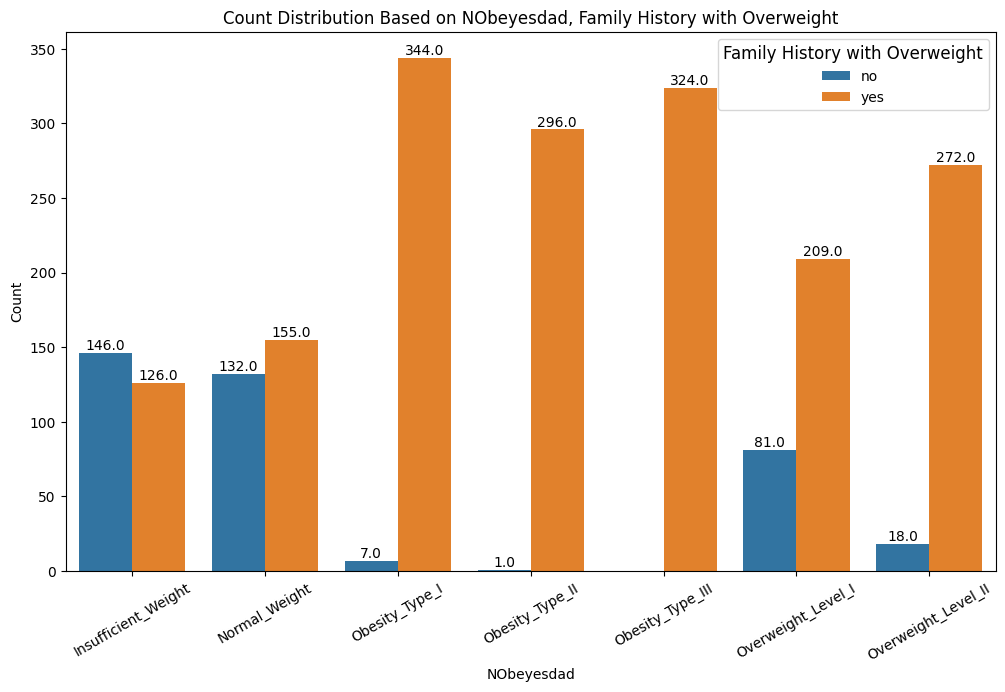

In [17]:
# Create a DataFrame with the count distribution
count_df = pd.DataFrame(df.groupby(['NObeyesdad', 'family_history_with_overweight'])['Gender'].count())

# Reset the index and rename the 'Gender' column
count_df = count_df.reset_index().rename(columns={'Gender': 'Count'})

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(data=count_df, x='NObeyesdad', y='Count', hue='family_history_with_overweight')

# Add value labels to each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', color='black')

plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.title('Count Distribution Based on NObeyesdad, Family History with Overweight')
plt.legend(title='Family History with Overweight', title_fontsize='12')
plt.xticks(rotation=30)
plt.show()


**Obeservation** Maximum cases `Obesity_Type_I`, `Obesity_Type_II` and `Obesity_Type_III` are observed if the person has Family History with Overweight

Frequent consumption of high caloric food `(FAVC)`

FAVC
yes    1866
no      245
Name: count, dtype: int64


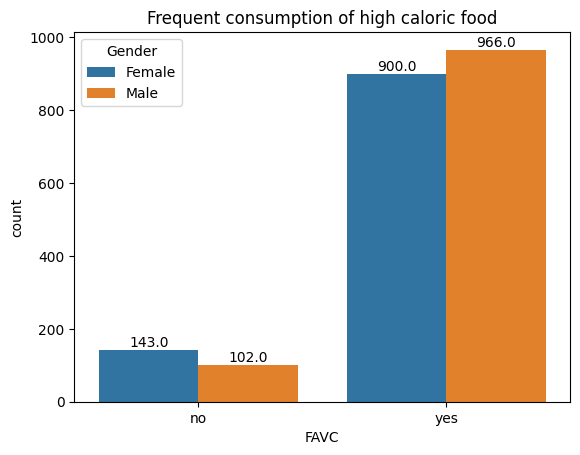

In [71]:
print(df['FAVC'].value_counts())
plt.title("Frequent consumption of high caloric food")
sns.countplot(data=df, x=df.FAVC, hue=df.Gender);

# Add value labels to each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', color='black')

**Observation** Both Male and Female frequently consumption of high caloric food

In [19]:
pd.DataFrame(df.groupby(['NObeyesdad', 'FAVC','Gender'])['Gender'].count())

Gender
NObeyesdad          FAVC Gender        
Insufficient_Weight no   Female      48
                         Male         3
                    yes  Female     125
                         Male        96
Normal_Weight       no   Female      34
                         Male        45
                    yes  Female     107
                         Male       101
Obesity_Type_I      no   Female       2
                         Male         9
                    yes  Female     154
                         Male       186
Obesity_Type_II     no   Female       1
                         Male         6
                    yes  Female       1
                         Male       289
Obesity_Type_III    no   Female       1
                    yes  Female     322
                         Male         1
Overweight_Level_I  no   Female      11
                         Male        11
                    yes  Female     134
                         Male       134
Overweight_Level_II no   Female      46
                         Male        28
                    yes  Female      57
                         Male       159

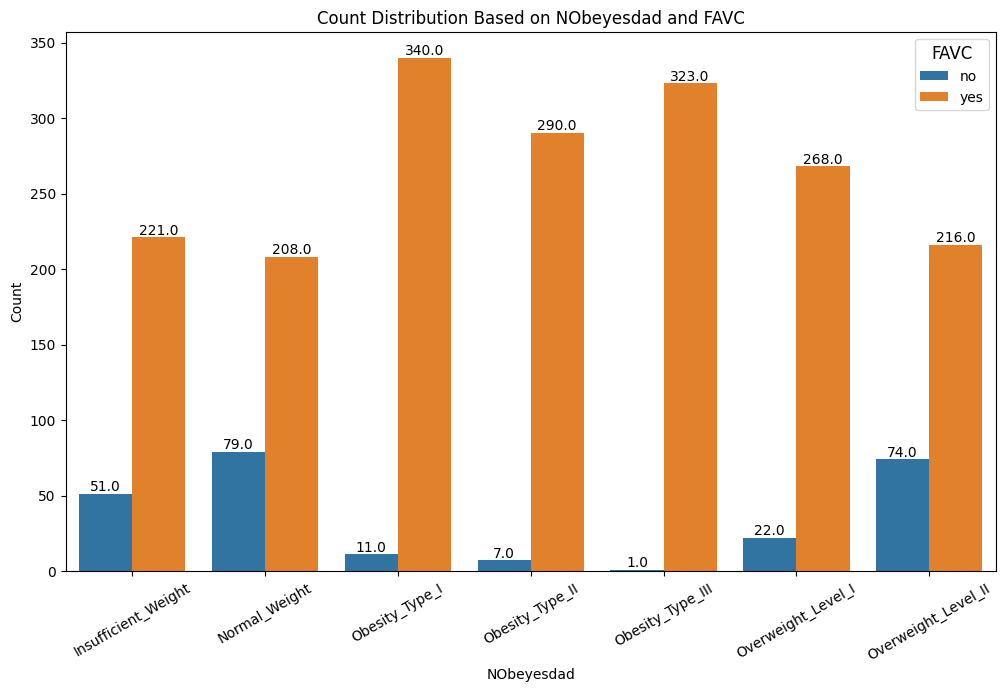

In [20]:
# Create a DataFrame with the count distribution
count_df = pd.DataFrame(df.groupby(['NObeyesdad', 'FAVC'])['Gender'].count())

# Reset the index to make the columns accessible
count_df = count_df.reset_index().rename(columns={'Gender': 'Count'})

# Convert the 'Count' column to numeric
count_df['Count'] = pd.to_numeric(count_df['Count'])

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(data=count_df, x='NObeyesdad', y='Count', hue='FAVC')

# Add value labels to each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', color='black')

plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.title('Count Distribution Based on NObeyesdad and FAVC')
plt.legend(title='FAVC', title_fontsize='12')
plt.xticks(rotation=30)
plt.show()


**Observation** Frequent consumption of high caloric food leady to obesity and overweight

Frequency of consumption of vegetables `(FCVC)`

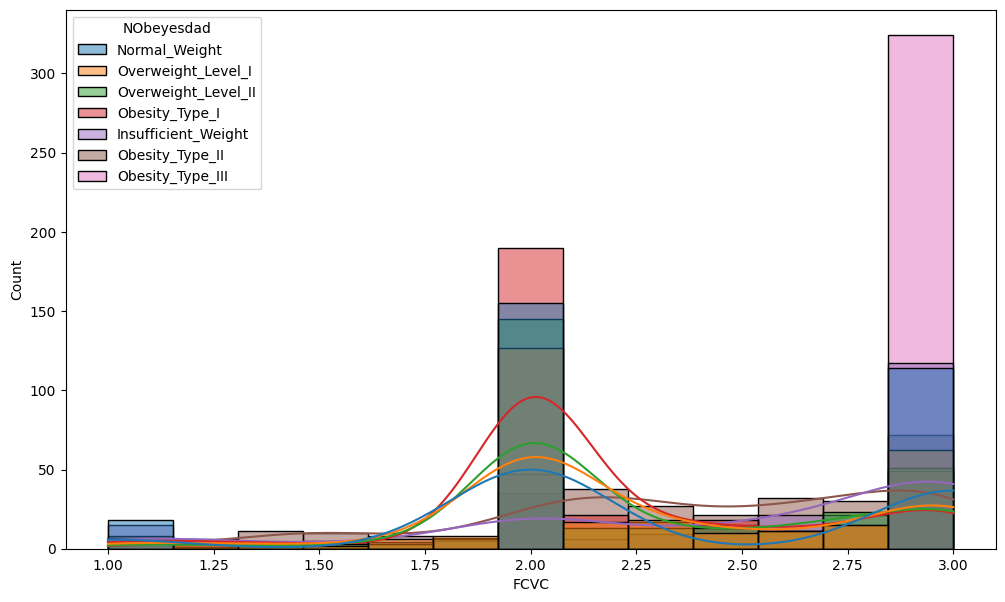

In [21]:
df['FCVC']
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x=df.FCVC, hue=df.NObeyesdad,kde=True);

Number of main meals `(NCP)`

<Axes: xlabel='NCP', ylabel='Count'>

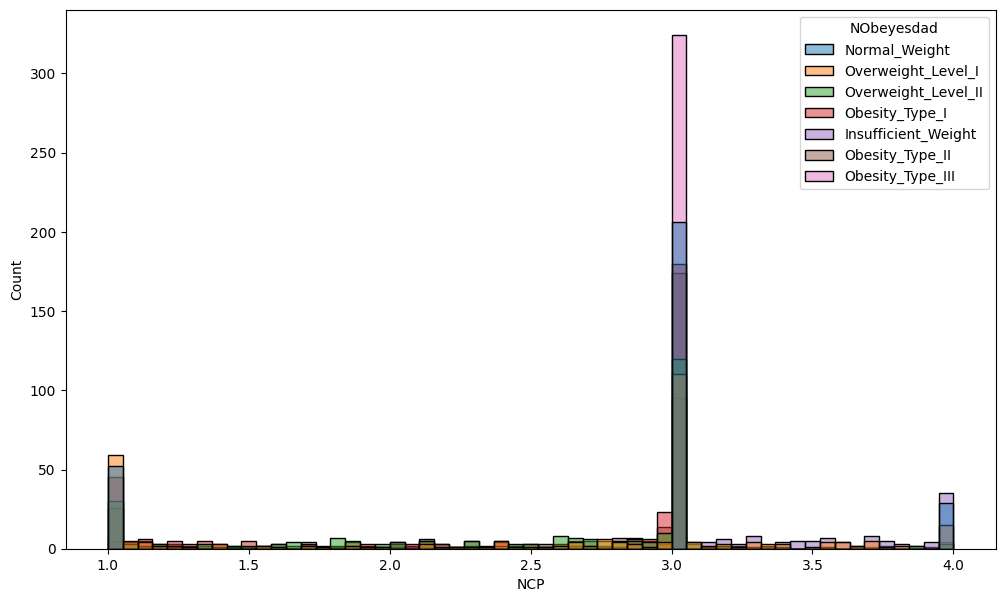

In [22]:
df['NCP']
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x=df.NCP, hue=df.NObeyesdad)

**Obeservation** Maximum people in the dataset, have 3 times main meal

Consumption of food between meals `(CAEC)`,

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64


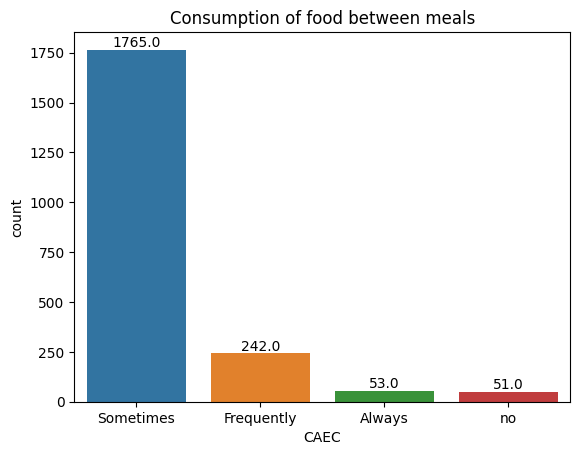

In [72]:
print(df['CAEC'].value_counts())
sns.countplot(data=df, x=df.CAEC)
plt.title("Consumption of food between meals")

# Add value labels to each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', color='black')

**Observation** Maximum people do not cosume any food between meals

In [24]:
pd.DataFrame(df.groupby(['NObeyesdad','CAEC'])['Gender'].count())

Gender
NObeyesdad          CAEC              
Insufficient_Weight Always           2
                    Frequently     121
                    Sometimes      146
                    no               3
Normal_Weight       Always          35
                    Frequently      83
                    Sometimes      159
                    no              10
Obesity_Type_I      Always           6
                    Frequently       6
                    Sometimes      338
                    no               1
Obesity_Type_II     Always           2
                    Frequently       1
                    Sometimes      293
                    no               1
Obesity_Type_III    Frequently       1
                    Sometimes      323
Overweight_Level_I  Always           5
                    Frequently      14
                    Sometimes      236
                    no              35
Overweight_Level_II Always           3
                    Frequently      16
                    Sometimes      270
                    no               1

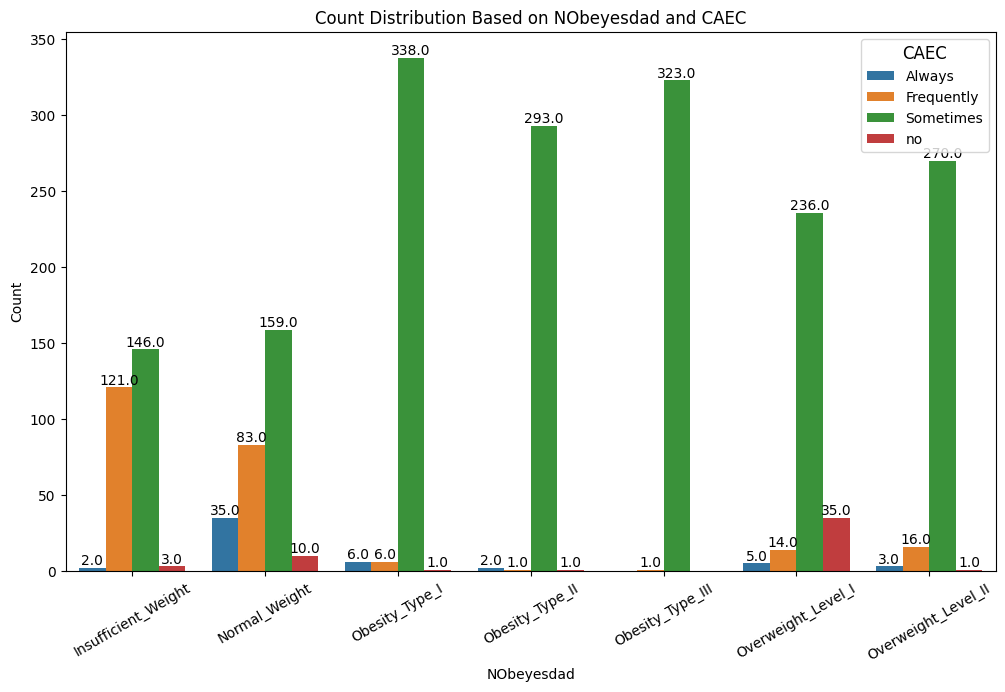

In [25]:
# Create a DataFrame with the count distribution
count_df = pd.DataFrame(df.groupby(['NObeyesdad', 'CAEC'])['Gender'].count())

# Reset the index to make the columns accessible
count_df = count_df.reset_index().rename(columns={'Gender': 'Count'})

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(data=count_df, x='NObeyesdad', y='Count', hue='CAEC')

# Add value labels to each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', color='black')

plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.title('Count Distribution Based on NObeyesdad and CAEC')
plt.legend(title='CAEC', title_fontsize='12')
plt.xticks(rotation=30)
plt.show()


**Observation** People with Insufficient_Weights consume food between main meals compare to other cateogry

SMOKE
no     2067
yes      44
Name: count, dtype: int64


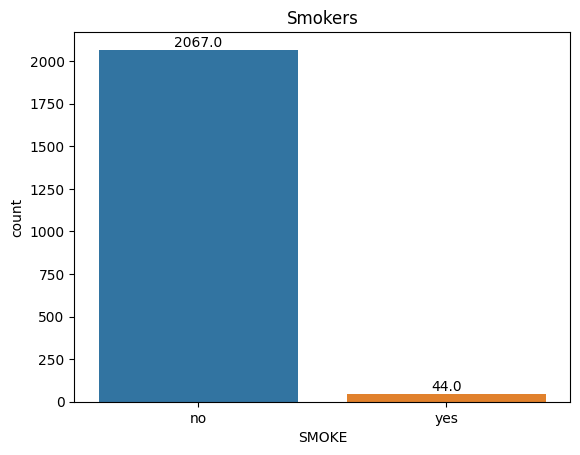

In [26]:
print(df['SMOKE'].value_counts())

sns.countplot(data=df, x=df.SMOKE)

plt.title('Smokers')

# Add value labels to each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', color='black')

In [27]:
pd.DataFrame(df.groupby(['NObeyesdad','SMOKE'])['Gender'].count())

Gender
NObeyesdad          SMOKE        
Insufficient_Weight no        271
                    yes         1
Normal_Weight       no        274
                    yes        13
Obesity_Type_I      no        345
                    yes         6
Obesity_Type_II     no        282
                    yes        15
Obesity_Type_III    no        323
                    yes         1
Overweight_Level_I  no        287
                    yes         3
Overweight_Level_II no        285
                    yes         5

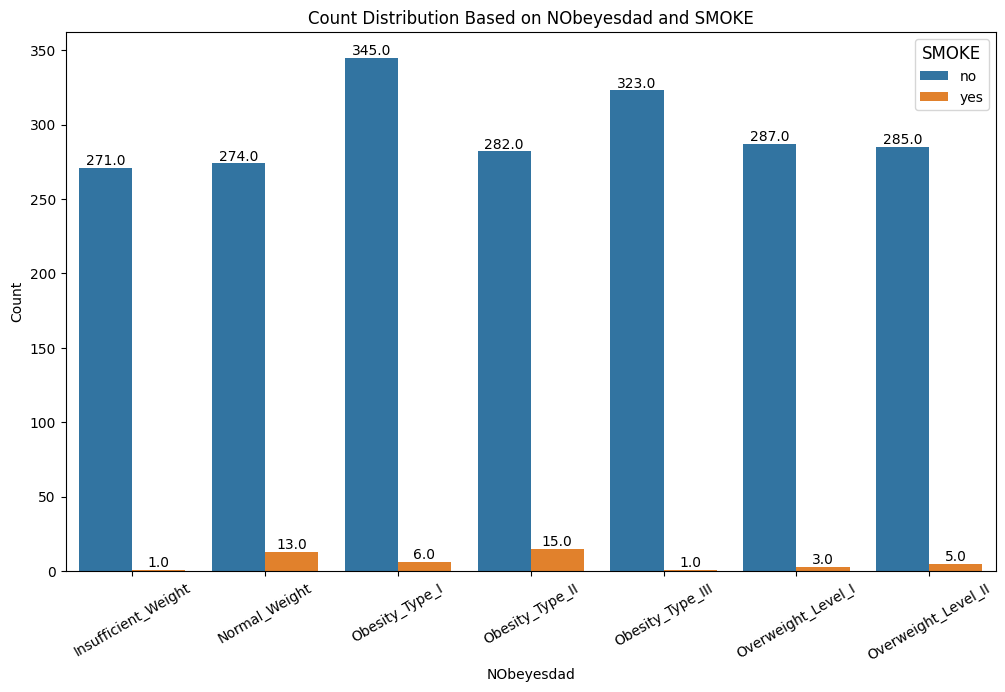

In [28]:
# Create a DataFrame with the count distribution
count_df = pd.DataFrame(df.groupby(['NObeyesdad', 'SMOKE'])['Gender'].count())

# Reset the index to make the columns accessible
count_df = count_df.reset_index().rename(columns={'Gender': 'Count'})

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(data=count_df, x='NObeyesdad', y='Count', hue='SMOKE')

# Add value labels to each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', color='black')

plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.title('Count Distribution Based on NObeyesdad and SMOKE')
plt.legend(title='SMOKE', title_fontsize='12')
plt.xticks(rotation=30)
plt.show()


**Observation** Maximum people in the dataset are non-smokers

Consumption of water daily `(CH20)`

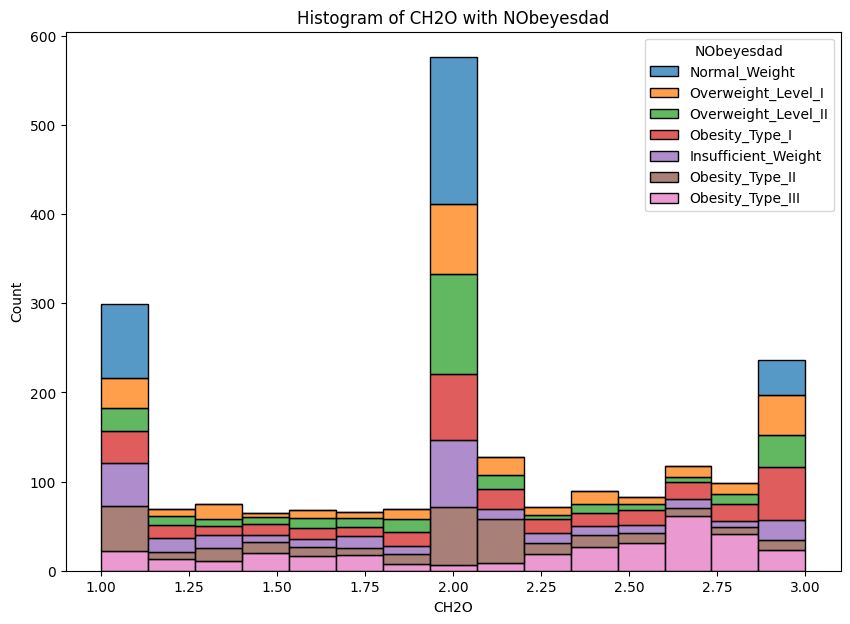

In [29]:
plt.figure(figsize=(10, 7))
sns.histplot(data=df, x='CH2O', hue='NObeyesdad', multiple='stack')

plt.xlabel('CH2O')
plt.ylabel('Count')
plt.title('Histogram of CH2O with NObeyesdad')

plt.show()

**Obeservation** people with Normal_Weight consume maximum water, people with Obesity_Type_III consume minimum water

Calories consumption monitoring `(SCC)`

SCC
no     2015
yes      96
Name: count, dtype: int64


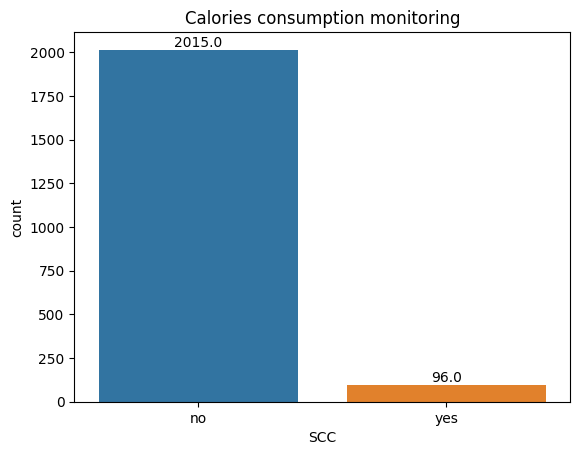

In [30]:
print(df['SCC'].value_counts())

#plot the graph
sns.countplot(data=df, x=df.SCC)

plt.title("Calories consumption monitoring")

# Add value labels to each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', color='black')

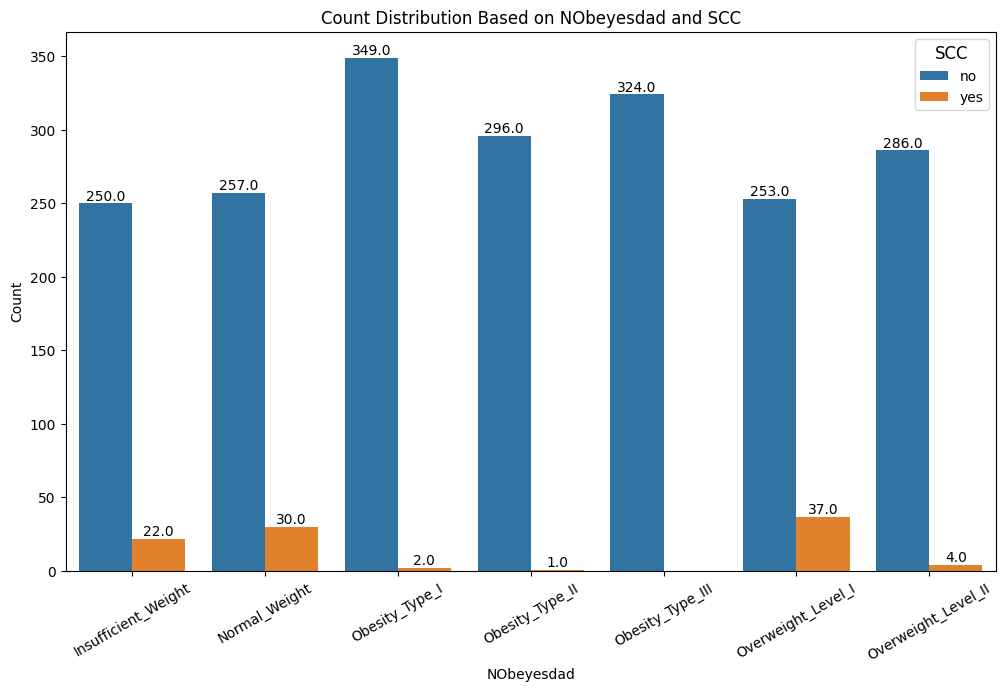

In [31]:
# Create a DataFrame with the count distribution
count_df = pd.DataFrame(df.groupby(['NObeyesdad', 'SCC'])['Gender'].count())

# Reset the index to make the columns accessible
count_df = count_df.reset_index().rename(columns={'Gender': 'Count'})

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(data=count_df, x='NObeyesdad', y='Count', hue='SCC')

# Add value labels to each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', color='black')

plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.title('Count Distribution Based on NObeyesdad and SCC')
plt.legend(title='SCC', title_fontsize='12')
plt.xticks(rotation=30)
plt.show()


**Observation** Maximum overweight people don't prefer Calories consumption monitoring

Physical activity frequency `(FAF)`

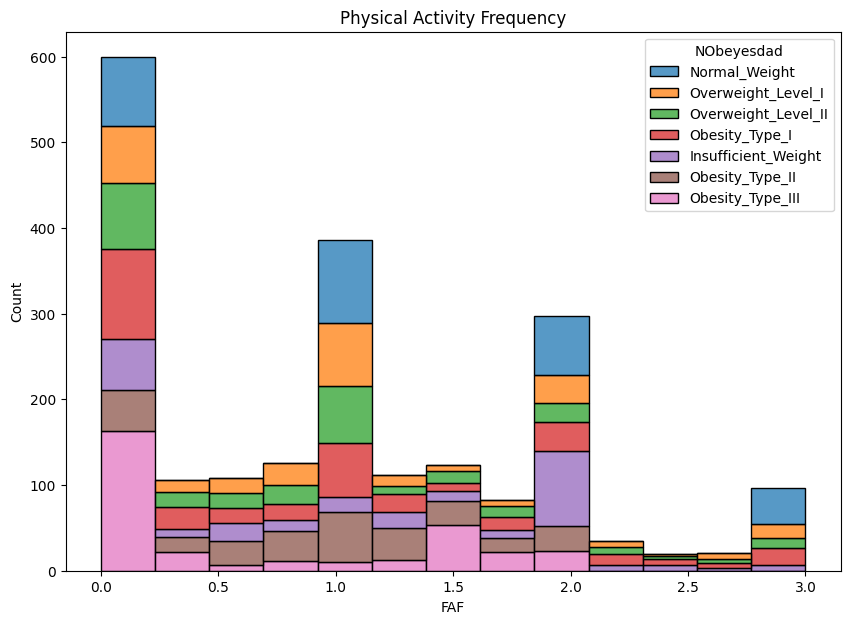

In [73]:
plt.figure(figsize=(10, 7))
sns.histplot(data=df, x='FAF', hue='NObeyesdad',multiple='stack')

plt.title("Physical Activity Frequency")
plt.xlabel('FAF')
plt.ylabel('Count')

plt.show()

Time using technology devices `(TUE)`

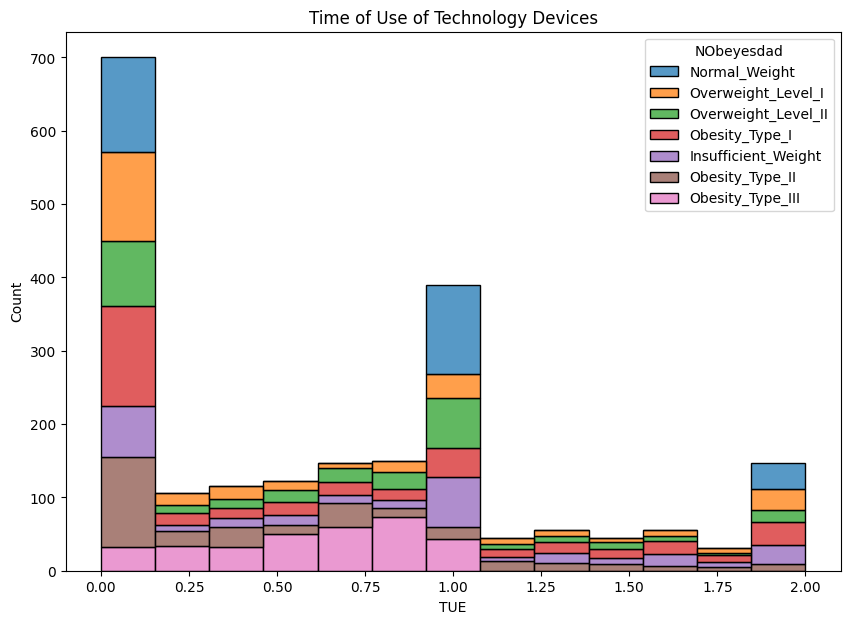

In [74]:
plt.figure(figsize=(10, 7))
sns.histplot(data=df, x='TUE', hue='NObeyesdad', multiple='stack')

plt.title("Time of Use of Technology Devices")
plt.xlabel('TUE')
plt.ylabel('Count')

plt.show()


**Observation** People with Normal Weight spend more time on Technology Devices

Consumption of alcohol `(CALC)`

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64


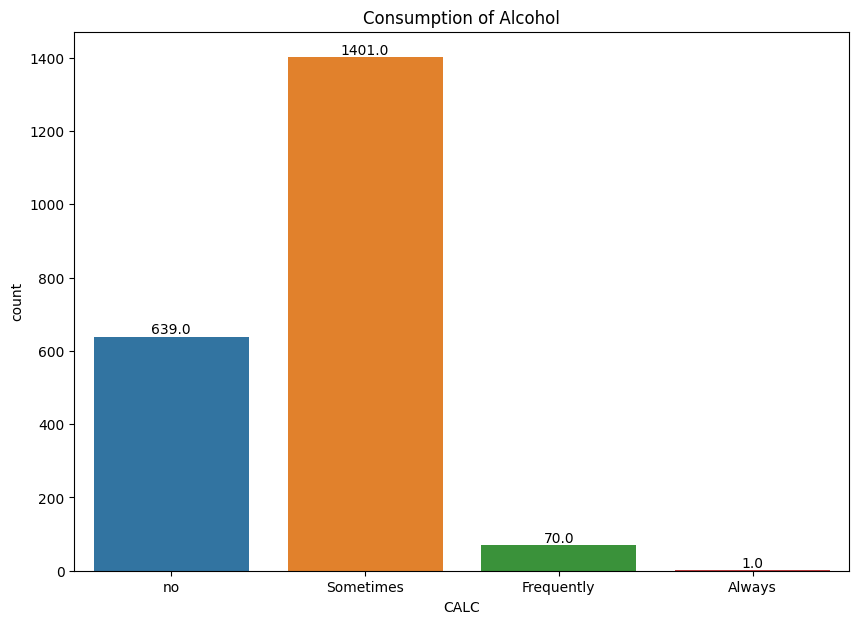

In [34]:
print(df.CALC.value_counts())

# Create the count plot
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='CALC')

plt.title('Consumption of Alcohol')

# Add value labels to each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', color='black')

plt.show()


Transportation used `(MTRANS)`

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64


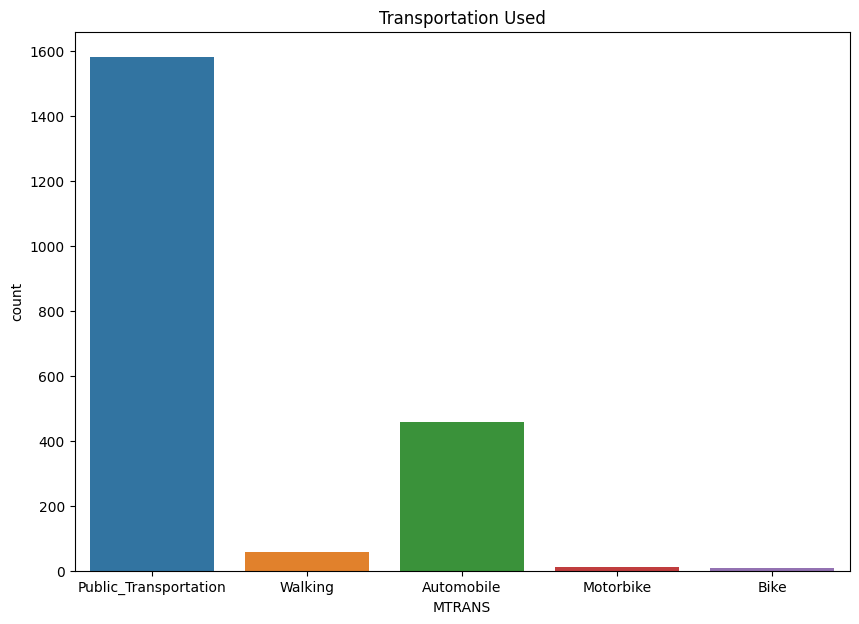

In [35]:
print(df['MTRANS'].value_counts())

plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='MTRANS')

plt.title('Transportation Used')

plt.show()


**Observation** Maximum people in the dataset use Public_Transportation

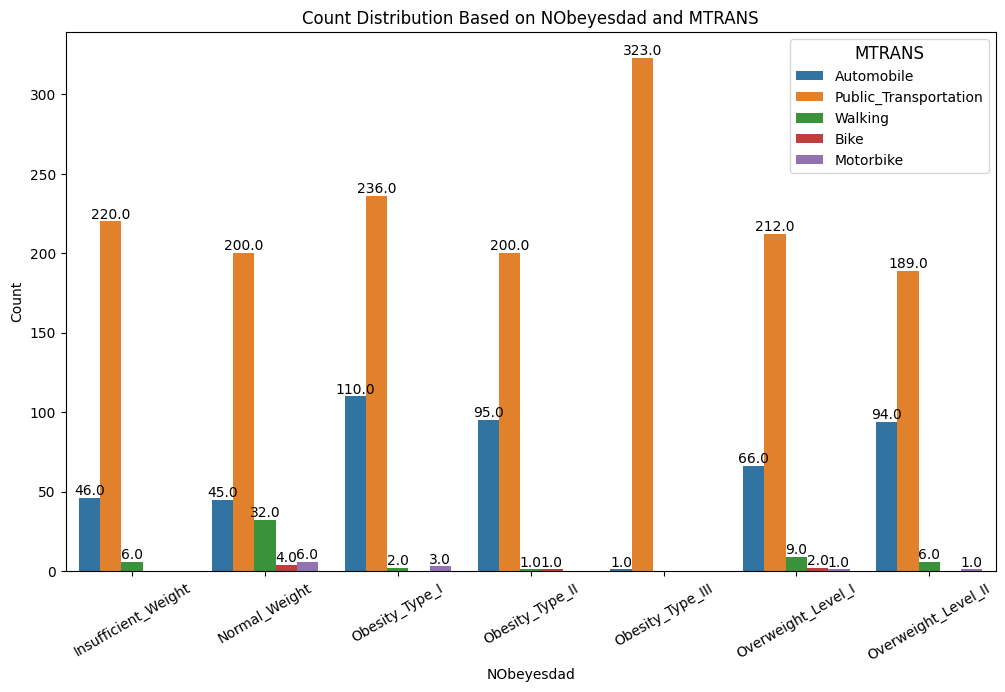

In [36]:
# Create a DataFrame with the count distribution
count_df = pd.DataFrame(df.groupby(['NObeyesdad', 'MTRANS'])['Gender'].count())

# Reset the index to make the columns accessible
count_df = count_df.reset_index().rename(columns={'Gender': 'Count'})

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(data=count_df, x='NObeyesdad', y='Count', hue='MTRANS')

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', color='black')

plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.title('Count Distribution Based on NObeyesdad and MTRANS')
plt.legend(title='MTRANS', title_fontsize='12')
plt.xticks(rotation=30)
plt.show()



Highest correlated features:
Weight  Height    0.463136
Age     TUE       0.296931
FAF     Height    0.294709
Height  NCP       0.243672
Weight  FCVC      0.216125
dtype: float64


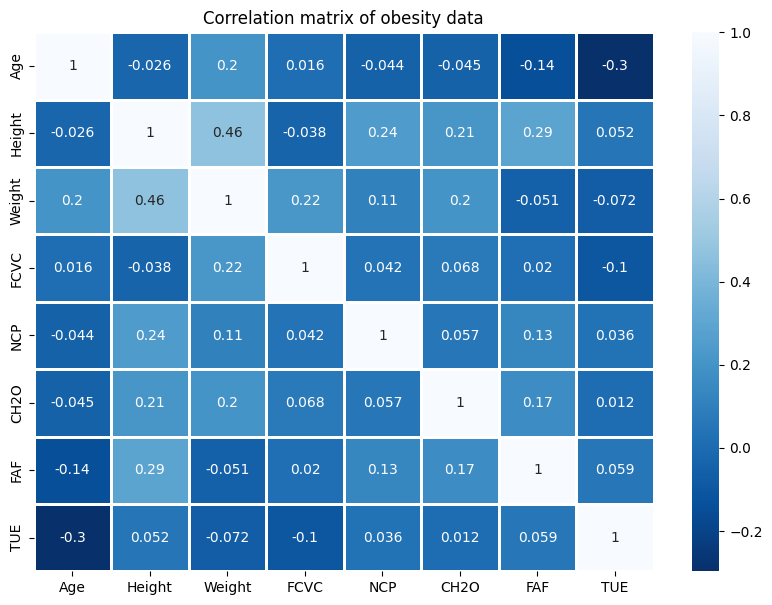

In [65]:
# sorting the numerical features
numerical_col = [i for i in df.columns if df[i].dtype!='O']

# Calculate the correlation matrix
corr_matrix = df[numerical_col].corr()

# Find the highest correlated features
highest_correlated_features = corr_matrix.abs().unstack().sort_values(ascending=False)

# Exclude self-correlations and duplicates
highest_correlated_features = highest_correlated_features[highest_correlated_features != 1].drop_duplicates()


highest_correlated_features.sort_values(ascending=False).head()

# Print the highest correlated features
print(f"Highest correlated features:\n{highest_correlated_features.sort_values(ascending=False).head()}")

# plotting the results
plt.figure(figsize = (10, 7))
sns.heatmap(df[numerical_col].corr(),
           annot = True,
           cmap = "Blues_r",
           linewidths = 2, 
           linecolor = "white")
plt.title("Correlation matrix of obesity data")
plt.show()

In [68]:
from sklearn.preprocessing import OneHotEncoder

# to handle multicolinearity
ohe = OneHotEncoder(drop='first')

In [116]:
categorical_column = [i for i in df.columns if i not in numerical_col]
print(f"Categorical columns in the dataset:\n{categorical_column}\n")

binary_category = []
multi_category = []
for i in categorical_column:
    if i != "NObeyesdad":
        if df[i].nunique() == 2:
            binary_category.append(i)
        else:
            multi_category.append(i)

print(f"binary Catergory features:\n{binary_category}\n")
print(f"multi Catergory features:\n{multi_category}")

Categorical columns in the dataset:
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

binary Catergory features:
['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

multi Catergory features:
['CAEC', 'CALC', 'MTRANS']


In [117]:
# splitting the dataset
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
print(f"Shape of Parent Dataset: {df.shape}")
print(f"Shape of the train dataset: {X_train.shape}")
print(f"Shape of the test dataset: {X_test.shape}")

Shape of Parent Dataset: (2111, 17)
Shape of the train dataset: (1688, 16)
Shape of the test dataset: (423, 16)


In [120]:
# Define the transformers for ordinal encoding and one-hot encoding
ordinal_transformer = OrdinalEncoder()
onehot_transformer = OneHotEncoder(drop='first')

# Define the transformer steps for the binary and multi-category features
preprocessor = ColumnTransformer(
    transformers=[
        ('binary', ordinal_transformer, binary_category),
        ('multi', onehot_transformer, multi_category)
    ])

# Create the pipeline with the preprocessor and the classification algorithm
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Standardize all features
    ('classifier', LogisticRegression())  # Logistic Regression classifier
])

# Fit the pipeline on X_train and y_train
pipeline.fit(X_train, y_train)

# Predict using the fitted pipeline
y_pred = pipeline.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.5319148936170213


In [127]:
# List of classification algorithms
classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    ExtraTreesClassifier()
]

# List to store accuracy scores
accuracy_scores = []

# Iterate over each classifier
for classifier in classifiers:
    # Create the pipeline with the preprocessor and current classifier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('scaler', StandardScaler()),  # Standardize all features
        ('classifier', classifier)
    ])

    # Fit the pipeline on X_train and y_train
    pipeline.fit(X_train, y_train)

    # Predict using the fitted pipeline
    y_pred = pipeline.predict(X_test)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Add the accuracy score to the list
    accuracy_scores.append(accuracy)

# Print the accuracy scores for each classifier
for classifier, accuracy in zip(classifiers, accuracy_scores):
    print(f"{classifier.__class__.__name__}: {accuracy}")


LogisticRegression: 0.5319148936170213
RandomForestClassifier: 0.607565011820331
SVC: 0.6122931442080378
KNeighborsClassifier: 0.5910165484633569
ExtraTreesClassifier: 0.607565011820331
